# CUSTOMER SEGMENTATION

### Loading data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#loading data
df = pd.read_csv('Mall_Customers.csv')

In [3]:
#inspecting data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#dropping customerID
df.drop(['CustomerID'], axis = 1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Data Preprocessing

In [5]:
#inspecting size of dataset
df.shape

(200, 4)

In [6]:
#inspecting datatypes
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

##### Conclusion:

All datatypes are coherent to expectation

In [7]:
#checking for missing values
missing_df = df.isnull()
missing_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [8]:
for column in missing_df.columns.values.tolist():
    print(column)
    print(missing_df[column].value_counts())
    print()

Gender
False    200
Name: Gender, dtype: int64

Age
False    200
Name: Age, dtype: int64

Annual Income (k$)
False    200
Name: Annual Income (k$), dtype: int64

Spending Score (1-100)
False    200
Name: Spending Score (1-100), dtype: int64



##### Conclusion:

No missing values in the dataset

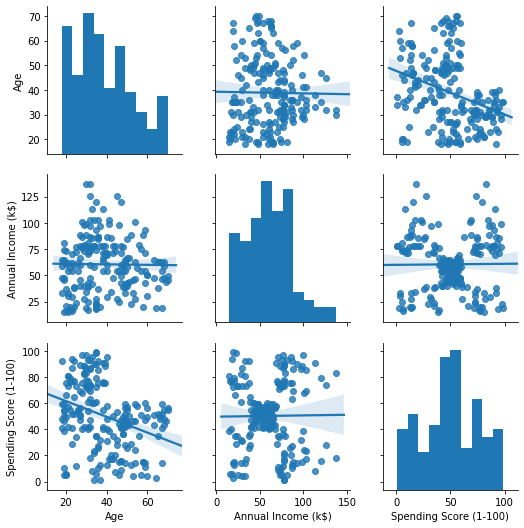

In [9]:
#plotting data for insights
sns.pairplot(df, kind = 'reg')

##### Conclusion:

There is some correlation between Age and Spending score.

In [10]:
#performing binning on age
bins = np.array([min(df['Age']), 35, 55, max(df['Age'])])
bins

array([18, 35, 55, 70])

In [11]:
#making groups
group_names = ['Young', 'Adult', 'Elder']

In [12]:
#adding groups to the table
df['Age-binned'] = pd.cut(df['Age'], bins, labels = group_names, include_lowest = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age-binned
0,Male,19,15,39,Young
1,Male,21,15,81,Young
2,Female,20,16,6,Young
3,Female,23,16,77,Young
4,Female,31,17,40,Young


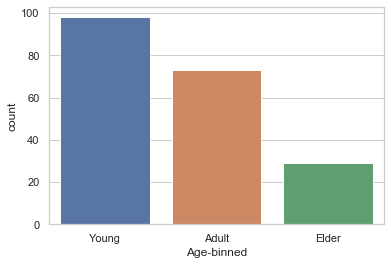

In [13]:
#plotting distribution of each bin
sns.set(style="whitegrid")
sns.countplot(x = df['Age-binned'])

##### Conclusion

The mall is frequented mostly by young people followed by adults and hardly by elders.

In [14]:
#performing binning on income
bins = np.linspace(min(df['Annual Income (k$)']), max(df['Annual Income (k$)']), 4)
bins

array([ 15.        ,  55.66666667,  96.33333333, 137.        ])

In [15]:
#making groups
group_names = ['Low', 'Medium', 'High']

In [16]:
#adding groups to table
df['Income-binned'] = pd.cut(df['Annual Income (k$)'], bins, labels = group_names, include_lowest = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age-binned,Income-binned
0,Male,19,15,39,Young,Low
1,Male,21,15,81,Young,Low
2,Female,20,16,6,Young,Low
3,Female,23,16,77,Young,Low
4,Female,31,17,40,Young,Low


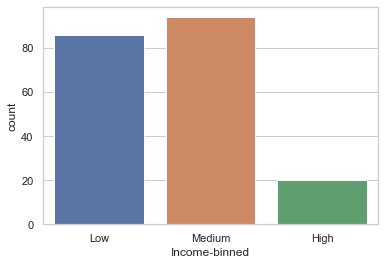

In [17]:
#plotting distribution of each bin
sns.countplot(x = df['Income-binned'])

##### Conclusion:

The mall is frequented mostly by low and medium wealth income people and hardly by high income people.

### Exploratory Data Analysis

In [18]:
#Understanding data distribution
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [19]:
#understanding inter column correlations
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


##### Conclusion:

There seems to be some correlation between age and spending score.

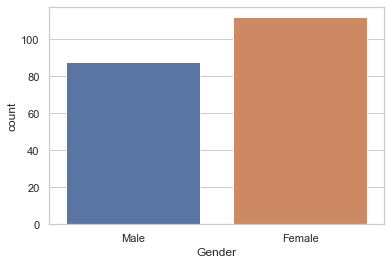

In [20]:
#understanding gender distribution
sns.countplot(x = df['Gender'])

##### Conclusion:
More females frequent the mall than males

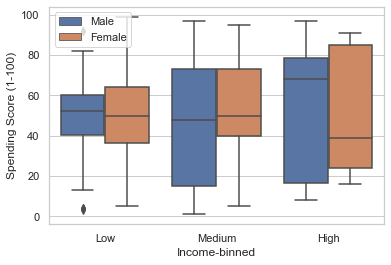

In [21]:
#finding relation between income and spending score
sns.boxplot(x = df['Income-binned'], y = df['Spending Score (1-100)'], hue = df['Gender']).legend(loc='upper left')

##### Conclusion:

High income males tend to spend more in the mall.

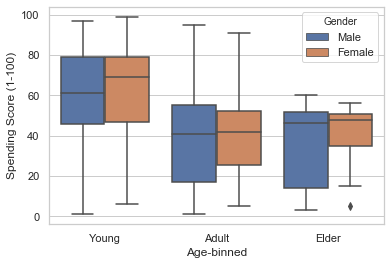

In [22]:
#finding relation between Age and Spending Score
sns.boxplot(x = df['Age-binned'], y = df['Spending Score (1-100)'], hue = df['Gender'])

##### Conclusion:

Young people tend to spend more in the mall. Especially females.

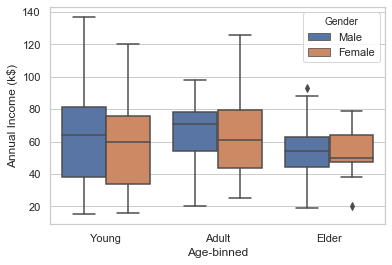

In [23]:
#finding relation between age and annual income
sns.boxplot(x = df['Age-binned'], y = df['Annual Income (k$)'], hue = df['Gender'])

##### Conclusion:

There is no relation in income and age brackets. Males tend to have more income than females on an average.

### Kmeans Clustering

Now we segregate customers based on their spending habits using Kmeans.

In [24]:
#Dropping extra columns used for analysis
df.drop(['Age-binned', 'Income-binned'], axis = 1, inplace = True)

In [25]:
#Handling categorical data
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis = 1)

In [26]:
#inspecting dataframe
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


In [27]:
#dropping Gender column
df.drop(['Gender'], axis = 1, inplace = True)

In [28]:
#inspecting dataframe
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [29]:
#Normalizing data
from sklearn import preprocessing
normalized_df = preprocessing.normalize(df)
print(normalized_df)

[[0.4138265  0.32670513 0.84943334 0.         0.02178034]
 [0.24700755 0.17643396 0.9527434  0.         0.01176226]
 [0.75973718 0.60778974 0.22792115 0.03798686 0.        ]
 [0.28067571 0.19525267 0.93965346 0.01220329 0.        ]
 [0.58058136 0.31838332 0.74913723 0.01872843 0.        ]
 [0.27183291 0.2100527  0.93905914 0.01235604 0.        ]
 [0.87885343 0.45198176 0.15066059 0.0251101  0.        ]
 [0.23365009 0.18285659 0.95491775 0.0101587  0.        ]
 [0.95757323 0.28427955 0.04488625 0.         0.01496208]
 [0.37365957 0.23665106 0.89678296 0.01245532 0.        ]
 [0.94310088 0.26744652 0.19706586 0.         0.01407613]
 [0.3279777  0.17804504 0.92770835 0.00937079 0.        ]
 [0.918209   0.31662379 0.23746785 0.01583119 0.        ]
 [0.28880051 0.24066709 0.9265683  0.01203335 0.        ]
 [0.84025832 0.45419368 0.29522589 0.         0.02270968]
 [0.26061522 0.23692293 0.93584556 0.         0.01184615]
 [0.650832   0.3904992  0.650832   0.0185952  0.        ]
 [0.27740345 0

In [30]:
#Calculating Kmeans intertia
from sklearn.cluster import KMeans
Kmeans_inertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_df)
    Kmeans_inertia.append(km.inertia_)

[Text(0, 0.5, 'Sum of squared distances'), Text(0.5, 0, 'clusters')]

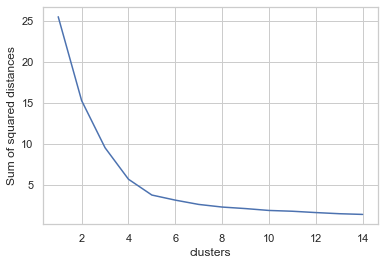

In [31]:
#Plotting inertia to find knee.
ax = sns.lineplot(K, Kmeans_inertia)
ax.set(xlabel='clusters', ylabel='Sum of squared distances')

##### Conclusion:

Optimal number of clusters is five. Therefore there are broadly five types of customers.

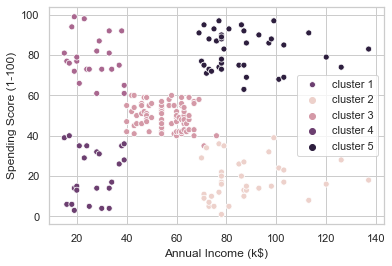

In [32]:
#Visualizing the five types of customers
km = KMeans(n_clusters = 5)
km.fit(df)
cluster = km.predict(df)
ax = sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue = cluster)
ax.legend(['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])

# Conclusions:

1) High income males are to be targeted.

2) Low income young males and females are to be advertised.

3) There are five types of customers: High income High spenders, High income low spenders, Average income average spenders,        Low income high spenders and low income low spenders. 